In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
csFiles = [
    "../PeakDetection_Cs137_IndividualPulses.csv",
    "../PeakDetection_Cs137_Areas.csv"
]

coFiles = [
    "../PeakDetection_Co60_IndividualPulses.csv",
    "../PeakDetection_Co60_Areas.csv"
]

#Individual pulses and areas of 137Cs
dfCs = pd.read_csv(csFiles[0], index_col = 0)
dfCs = dfCs.T
dfCsArea = pd.read_csv(csFiles[1], index_col = 0)
dfCsArea = dfCsArea.rename({"Cs137": "AreaCs137"}, axis='columns')

#Individual pulses and areas of 60Co
dfCo = pd.read_csv(coFiles[0], index_col = 0)
dfCo = dfCo.T
dfCoArea = pd.read_csv(coFiles[1], index_col = 0)
dfCoArea = dfCoArea.rename({"Co60": "AreaCo60"}, axis='columns')
    


In [3]:
dfCs.reset_index(inplace=True)
# dfCs = dfCs.drop("level_0", axis = 1)
dfCs = dfCs.drop("index", axis = 1)
dfCs

0     1     2     3     4     5     6     7     8     9     ...  1490  \
0       137   136   137   136   138   136   137   136   137   136  ...   130   
1       137   136   137   136   138   136   137   137   137   137  ...   137   
2       137   136   137   136   138   136   137   136   137   136  ...   137   
3       126   124   129   130   132   131   131   124   122   120  ...   137   
4       136   136   137   136   138   136   137   137   137   136  ...   133   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
26078   136   136   136   136   138   136   136   136   136   136  ...   137   
26079   133   132   134   133   135   135   135   132   130   127  ...   137   
26080   131   132   134   134   136   136   136   135   136   134  ...   136   
26081   133   133   134   135   136   134   132   130   131   132  ...   136   
26082   137   136   137   136   138   135   137   136   137   136  ...   137   

       1491  1492  1493  1494  1495  1496  1497  1498  1499  
0       132   132   131   131   130   131   132   133   135  
1       136   137   136   137   136   137   136   137   136  
2       136   137   136   137   136   137   136   137   136  
3       136   137   136   137   136   137   137   137   136  
4       131   132   132   130   129   127   128   131   132  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
26078   136   137   136   137   136   137   136   137   136  
26079   136   136   136   137   136   137   136   137   136  
26080   136   137   136   135   133   134   135   135   135  
26081   136   136   136   137   136   137   135   137   136  
26082   136   138   136   137   136   137   135   137   136  

[26083 rows x 1500 columns]

In [4]:
dfCsArea.reset_index(inplace=True)
# dfCsArea = dfCsArea.drop("level_0", axis = 1)
dfCsArea = dfCsArea.drop("index", axis = 1)
dfCsArea

AreaCs137
0           4802
1           2782
2           2476
3           5211
4           3729
...          ...
26078       3459
26079       4698
26080       4225
26081       4442
26082       2490

[26083 rows x 1 columns]

In [5]:
dfCo.reset_index(inplace=True)
# dfCo = dfCo.drop("level_0", axis = 1)
dfCo = dfCo.drop("index", axis = 1)
dfCo

0     1     2     3     4     5     6     7     8     9     ...  1490  \
0       126   127   127   129   130   124   121   121   117   110  ...   137   
1       135   135   135   135   136   134   131   131   133   134  ...   136   
2       132   133   135   135   137   136   136   132   133   131  ...   136   
3       130   131   132   134   135   133   134   132   132   132  ...   137   
4       137   136   136   136   138   136   137   136   136   136  ...   137   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
24199   133   134   135   135   136   135   136   136   136   135  ...   137   
24200   118   123   126   129   130   129   127   124   124   123  ...   137   
24201   119   124   125   127   130   129   128   127   123   122  ...   136   
24202   137   136   137   136   139   136   137   137   137   136  ...   137   
24203   120   120   122   124   125   123   119   113   113   117  ...   136   

       1491  1492  1493  1494  1495  1496  1497  1498  1499  
0       136   137   136   137   136   137   136   137   136  
1       137   137   136   137   136   137   136   137   137  
2       135   137   136   137   136   137   136   137   136  
3       136   137   133   132   133   134   134   134   131  
4       136   137   136   137   136   137   136   137   136  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
24199   136   137   136   137   136   136   136   137   136  
24200   136   137   136   137   137   137   136   137   136  
24201   137   136   137   137   137   136   137   136   136  
24202   136   137   136   137   136   137   136   137   136  
24203   136   136   136   137   136   137   136   137   136  

[24204 rows x 1500 columns]

In [6]:
dfCoArea.reset_index(inplace=True)
# dfCoArea = dfCoArea.drop("level_0", axis = 1)
dfCoArea = dfCoArea.drop("index", axis = 1)
dfCoArea

AreaCo60
0          8142
1          3884
2          3683
3          5881
4          2574
...         ...
24199      3637
24200      6098
24201      7142
24202      3895
24203      6781

[24204 rows x 1 columns]

In [7]:
dfCs = pd.concat([dfCs, dfCsArea], axis = 1)
dfCo = pd.concat([dfCo, dfCoArea], axis = 1)

In [12]:
dfCs

0    1    2    3    4    5    6    7    8    9  ...  1491  1492  \
0      137  136  137  136  138  136  137  136  137  136  ...   132   132   
1      137  136  137  136  138  136  137  137  137  137  ...   136   137   
2      137  136  137  136  138  136  137  136  137  136  ...   136   137   
3      126  124  129  130  132  131  131  124  122  120  ...   136   137   
4      136  136  137  136  138  136  137  137  137  136  ...   131   132   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
26078  136  136  136  136  138  136  136  136  136  136  ...   136   137   
26079  133  132  134  133  135  135  135  132  130  127  ...   136   136   
26080  131  132  134  134  136  136  136  135  136  134  ...   136   137   
26081  133  133  134  135  136  134  132  130  131  132  ...   136   136   
26082  137  136  137  136  138  135  137  136  137  136  ...   136   138   

       1493  1494  1495  1496  1497  1498  1499  AreaCs137  
0       131   131   130   131   132   133   135       4802  
1       136   137   136   137   136   137   136       2782  
2       136   137   136   137   136   137   136       2476  
3       136   137   136   137   137   137   136       5211  
4       132   130   129   127   128   131   132       3729  
...     ...   ...   ...   ...   ...   ...   ...        ...  
26078   136   137   136   137   136   137   136       3459  
26079   136   137   136   137   136   137   136       4698  
26080   136   135   133   134   135   135   135       4225  
26081   136   137   136   137   135   137   136       4442  
26082   136   137   136   137   135   137   136       2490  

[26083 rows x 1501 columns]

In [9]:
dfCo

0    1    2    3    4    5    6    7    8    9  ...  1491  1492  \
0      126  127  127  129  130  124  121  121  117  110  ...   136   137   
1      135  135  135  135  136  134  131  131  133  134  ...   137   137   
2      132  133  135  135  137  136  136  132  133  131  ...   135   137   
3      130  131  132  134  135  133  134  132  132  132  ...   136   137   
4      137  136  136  136  138  136  137  136  136  136  ...   136   137   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
24199  133  134  135  135  136  135  136  136  136  135  ...   136   137   
24200  118  123  126  129  130  129  127  124  124  123  ...   136   137   
24201  119  124  125  127  130  129  128  127  123  122  ...   137   136   
24202  137  136  137  136  139  136  137  137  137  136  ...   136   137   
24203  120  120  122  124  125  123  119  113  113  117  ...   136   136   

       1493  1494  1495  1496  1497  1498  1499  AreaCo60  
0       136   137   136   137   136   137   136      8142  
1       136   137   136   137   136   137   137      3884  
2       136   137   136   137   136   137   136      3683  
3       133   132   133   134   134   134   131      5881  
4       136   137   136   137   136   137   136      2574  
...     ...   ...   ...   ...   ...   ...   ...       ...  
24199   136   137   136   136   136   137   136      3637  
24200   136   137   137   137   136   137   136      6098  
24201   137   137   137   136   137   136   136      7142  
24202   136   137   136   137   136   137   136      3895  
24203   136   137   136   137   136   137   136      6781  

[24204 rows x 1501 columns]

# Isolate pulses related to photopeak energies

In [13]:
#As no calibrated data is still acquired, energy is measured in integrated ADC channels

#Photopeak ranges for Cobalt-60 and Caesium-137
ppCo = [7000,8000]
ppCs = [4000,5000]

dfPpCo = dfCo.loc[((dfCo["AreaCo60"] > ppCo[0])  & (dfCo["AreaCo60"] < ppCo[1]))]
dfPpCs = dfCs.loc[((dfCs["AreaCs137"] > ppCs[0]) & (dfCs["AreaCs137"] < ppCs[1]))]

In [41]:
dfPpCo

0    1    2    3    4    5    6    7    8    9  ...  1491  1492  \
13     118  120  123  124  128  127  128  127  125  124  ...   136   137   
20     103  107  111  118  123  119  117  118  114  113  ...   137   137   
26      99  112  114  119  123  121  115  112  107  107  ...   134   134   
29     116  121  124  124  127  126  124  122  118  108  ...   136   136   
37     136  136  136  136  138  136  137  136  136  136  ...   137   137   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
24158  115  116  122  124  125  124  125  121  116  113  ...   136   137   
24161   96  101  110  115  118  117  114  112  116  117  ...   136   137   
24164  114  114  118  122  123  120  123  122  122  121  ...   136   137   
24198  119  121  125  125  128  128  127  126  128  126  ...   136   136   
24201  119  124  125  127  130  129  128  127  123  122  ...   137   136   

       1493  1494  1495  1496  1497  1498  1499  AreaCo60  
13      137   137   137   137   136   137   136      7319  
20      137   136   137   137   136   136   136      7311  
26      136   135   137   136   137   136   137      7468  
29      136   137   136   136   136   137   136      7899  
37      136   137   136   137   136   136   136      7006  
...     ...   ...   ...   ...   ...   ...   ...       ...  
24158   136   137   136   136   136   137   136      7466  
24161   136   136   136   137   136   137   136      7820  
24164   136   136   136   137   135   134   134      7788  
24198   136   137   136   137   136   136   136      7433  
24201   137   137   137   136   137   136   136      7142  

[3164 rows x 1501 columns]

In [42]:
dfPpCs

0    1    2    3    4    5    6    7    8    9  ...  1491  1492  \
0      137  136  137  136  138  136  137  136  137  136  ...   132   132   
13     132  133  133  134  135  134  133  134  134  131  ...   135   136   
17     133  134  135  135  136  135  136  136  136  135  ...   136   137   
22     136  136  137  136  138  136  137  136  137  136  ...   136   137   
27     125  127  128  129  131  131  130  127  123  119  ...   136   137   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
26076  123  127  129  131  134  134  127  123  125  126  ...   136   136   
26077  131  131  132  133  134  134  133  134  134  133  ...   137   137   
26079  133  132  134  133  135  135  135  132  130  127  ...   136   136   
26080  131  132  134  134  136  136  136  135  136  134  ...   136   137   
26081  133  133  134  135  136  134  132  130  131  132  ...   136   136   

       1493  1494  1495  1496  1497  1498  1499  AreaCs137  
0       131   131   130   131   132   133   135       4802  
13      135   136   135   136   136   137   136       4399  
17      136   137   136   136   136   137   136       4006  
22      136   136   136   137   136   136   136       4213  
27      135   137   136   137   136   137   136       4697  
...     ...   ...   ...   ...   ...   ...   ...        ...  
26076   137   136   136   137   137   136   137       4467  
26077   137   136   137   136   137   136   137       4784  
26079   136   137   136   137   136   137   136       4698  
26080   136   135   133   134   135   135   135       4225  
26081   136   137   136   137   135   137   136       4442  

[8781 rows x 1501 columns]

<IPython.core.display.Javascript object>


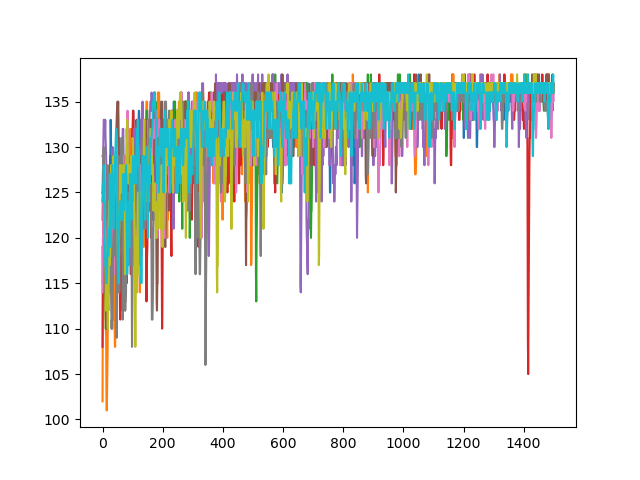

[]

In [44]:
%matplotlib notebook
plt.plot(dfPpCo.T[dfPpCo.T.columns[100:110]][:-1])
plt.plot()

<IPython.core.display.Javascript object>


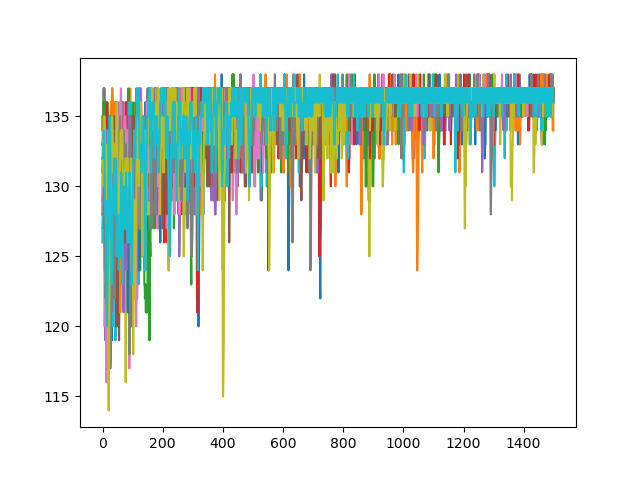

[]

In [43]:
%matplotlib notebook
plt.plot(dfPpCs.T[dfPpCs.T.columns[200:220]][:-1])
plt.plot()